In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from micrograd.engine import Value
from micrograd.nn import MLP
from micrograd.utils import draw_dot

In [2]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L.backward()
print(L)

Value(data=-8.0, grad=1)


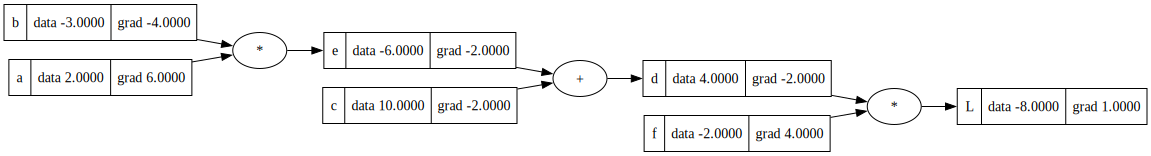

In [3]:
draw_dot(L)

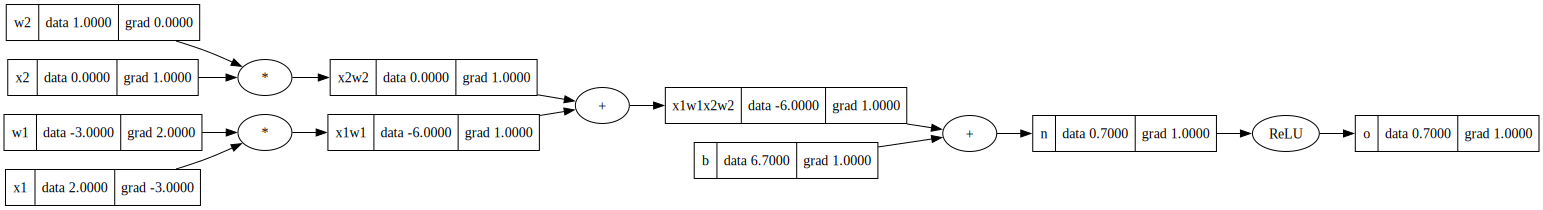

In [6]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.7, label='b')

# x1*w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.relu(); o.label = 'o'
o.backward()
draw_dot(o)

In [37]:
# define the network
n = MLP(3, [4, 4, 1])
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0], 
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [38]:
lr = 0.01
for i in range(1000):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # reset the grads
    for p in n.parameters():
        p.grad = 0.0

    # backward pass
    loss.backward()
    print(loss.data)

    # update the parameters
    for p in n.parameters():
        p.data -= p.grad * lr

3.782647099715463
3.16832258960887
2.754272344574165
2.4581327323191644
2.2374411617248278
2.0657197663155027
1.925958038914842
1.8360480071517706
1.7318224864124159
1.6153486680373632
1.5148313339589166
1.4241285106144184
1.34008559304296
1.2611560552086172
1.1866342373672647
1.1160946111563321
1.049258465763234
0.9859146892515283
0.9258869563898802
0.8690197403619295
0.8159544730378498
0.7876693231412732
0.7284540998773279
0.6793613962626981
0.6349771532400813
0.5936450641614719
0.5548406833538313
0.5183508491136213
0.4840595011837741
0.4518436355068244
0.4215832416004598
0.3931984272775171
0.3665939019132797
0.34167688581112743
0.31835713356849105
0.2965470424964405
0.27616178730230173
0.25711945674116476
0.23934117901539004
0.22275122773096395
0.207277103382
0.1928495876911983
0.17940276998074228
0.16687404618394683
0.15520409218224043
0.14433681390516867
0.13421927710493087
0.12480161995616185
0.11603695168164159
0.1078812403093081
0.10029646747664192
0.09323737847892061
0.0866708

In [39]:
ypred

[Value(data=0.9999999999999987, grad=-2.6645352591003757e-15),
 Value(data=-1.0, grad=0.0),
 Value(data=-0.9999999999999998, grad=4.440892098500626e-16),
 Value(data=0.9999999999999987, grad=-2.6645352591003757e-15)]